In [1]:
#Update. Este es el que está funcionando
# Unificado con varios modelos

print ("Running with mi_virtual_env_3_8")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
#Delete the next
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import time 


Running with mi_virtual_env_3_8


In [2]:
file= "lecturas_trampas_boll_weevil_06.csv"
bollweevil =  pd.read_csv(file, delimiter=";", decimal=',', encoding="utf-8")
df= bollweevil

In [3]:

import datetime
  
# using now() to get current time
current_time = datetime.datetime.now()
  
# Printing value of now.
print ("Time now at greenwich meridian is : "
                                    , end = "")
print (current_time)

Time now at greenwich meridian is : 2022-05-14 14:58:37.262712


In [4]:
print (df.columns)

Index(['N', 'City', 'Route', 'Trap code', 'Name GPS', 'Date of reading',
       'Entidad que realizo la lectura', 'Epoca cultivo', 'Red', 'Black',
       'RedBlack', 'Pluviometric_day', 'Humidity', 'Maximum_temperature',
       'Observaciones', 'crop stage'],
      dtype='object')


In [17]:
#Questions
BlackORRed = input('Do you want to work with 1-Red, OR 2-Black? ')
if BlackORRed == '1':
    BlackORRed = 'Red'
    print('You choose Red')
else:
    BlackORRed = 'Black'
    print('You choose Black')

All_City= input ('Do you want 1-ALL, or by 2-CITY')
City= ''
if All_City == '2':
    City = input('Choose the city you want to work with: 1-Monteria, 2-Cienaga de Oro, 3-Lorica, 4-Cerete')
    if City == '1':
        City = 'Monteria'
    elif City == '2':
        City = 'Cienaga de Oro'
    elif City == '3':
        City = 'Lorica'
    elif City == '4':
        City = 'Cerete'
print ('You choose the City: ', City)

All_Tem_Plu_Hum= input ('Do you want 1-ALL, or any specific: 2-Maximum_temperature, 3-Pluviometric_day, 4-Humidity')
if All_Tem_Plu_Hum == '1':
    All_Tem_Plu_Hum = "All_the_variables_were_selected"
elif All_Tem_Plu_Hum == '2':
    All_Tem_Plu_Hum = 'Maximum_temperature'
elif All_Tem_Plu_Hum == '3':
    All_Tem_Plu_Hum = 'Pluviometric_day'
elif All_Tem_Plu_Hum == '4':
    All_Tem_Plu_Hum = 'Humidity'
print('All_Tem_Plu_Hum: ', All_Tem_Plu_Hum)

algorithm = '2' # input ('Choose the algorithm: 1-RandomForest, 2-XGBoosting, 3-RandomForestRegressor')
CrosVal = '2' # input ('Do you want to run the Cros Validation? Yes = 1, No = 2')

You choose Red
You choose the City:  
All_Tem_Plu_Hum:  Maximum_temperature


Using the variable:  Maximum_temperature
All:  (13583, 3)
Without NA:  (7969, 3) 

BEFORE FILTERING::::Graph Maximum_temperature  and BlackORRed: 


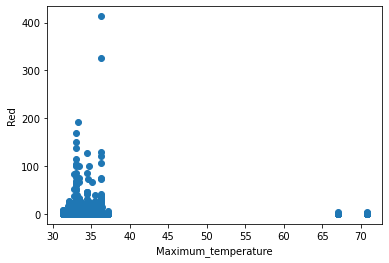

Red < 150: 
(7964, 3)
All_Tem_Plu_Hum:  Maximum_temperature
Maximum_temperature < 50:  (7920, 3)
AFTER FILTERING::::Graph Maximum_temperature  and BlackORRed: 


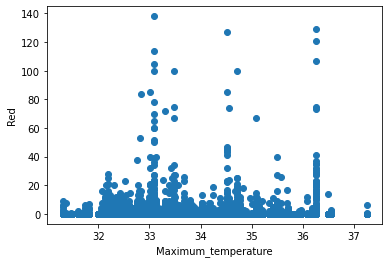

Index(['City', 'Maximum_temperature', 'Red'], dtype='object')


In [18]:
#All variables or not

#bollweill2 = bollweill[['Pluviometric_day', 'Humidity', 'Maximum_temperature', 'Black']]
#BlackORRed = input('Do you want to work with Red (1) OR Black(2)? ')

df2             = df[['City', 'Pluviometric_day', 'Humidity', 'Maximum_temperature', BlackORRed]]
# df2             = df[['City', 'Pluviometric_day', 'Humidity', 'Maximum_temperature', BlackORRed, 'Black']] # Esta linea es para cuando se va a hacer la correlación y usa Red, Black


if All_Tem_Plu_Hum == 'All_the_variables_were_selected':
    print ('All the variables were selected')
else:
    print ('Using the variable: ', All_Tem_Plu_Hum)
    df2   = df2[['City', All_Tem_Plu_Hum, BlackORRed]]

print('All: ', df2.shape)
df2= df2.dropna()
print('Without NA: ', df2.shape, '\n')

if All_Tem_Plu_Hum == 'All_the_variables_were_selected':
    # by defaul when is all variables is graphiced with Maximum_temperature
    print('BEFORE FILTERING::::Graph Maximum_temperature (by defaul) and BlackORRed: ')
    plt.scatter('Maximum_temperature', BlackORRed, data= df2)
    plt.xlabel('Maximum_temperature')
else:
    # Specific for each variable
    print('BEFORE FILTERING::::Graph' , All_Tem_Plu_Hum, ' and BlackORRed: ')
    plt.scatter(All_Tem_Plu_Hum, BlackORRed, data= df2)
    plt.xlabel(All_Tem_Plu_Hum)
plt.ylabel(BlackORRed)
plt.show()

if BlackORRed == 'Red':
    df2 = df2[df2.Red < 150]
    print ('Red < 150: ')
elif BlackORRed == 'Black':
    df2 = df2[df2.Black < 200] # <1200 or <500 or < 200
    print ('Black < 200: ')
print (df2.shape)

# Filter outliers from Maximum_temperature
if All_Tem_Plu_Hum == 'Maximum_temperature' or All_Tem_Plu_Hum == 'All_the_variables_were_selected':
    print('All_Tem_Plu_Hum: ', All_Tem_Plu_Hum)
    df2 = df2[df2.Maximum_temperature < 50]
    print ('Maximum_temperature < 50: ', df2.shape)
# Filter outliers from Humidity
if All_Tem_Plu_Hum == 'Humidity' or All_Tem_Plu_Hum == 'All_the_variables_were_selected':
    print('All_Tem_Plu_Hum: ', All_Tem_Plu_Hum)
    df2 = df2[df2.Humidity > 68]
    print ('Humidity > 68: ', df2.shape)

# Note: Pluviometric_day does not have outliers


if All_Tem_Plu_Hum == 'All_the_variables_were_selected':
    # by defaul when is all variables is graphiced with Maximum_temperature
    print('AFTER FILTERING::::Graph Maximum_temperature (by defaul) and BlackORRed: ')
    plt.scatter('Maximum_temperature', BlackORRed, data= df2)
    plt.xlabel('Maximum_temperature')
else:
    # Specific for each variable
    print('AFTER FILTERING::::Graph' , All_Tem_Plu_Hum, ' and BlackORRed: ')
    plt.scatter(All_Tem_Plu_Hum, BlackORRed, data= df2)
    plt.xlabel(All_Tem_Plu_Hum)
plt.ylabel(BlackORRed)
plt.show()

print(df2.columns)

In [19]:

#By City
if All_City == '2': #Si se seleccionó una ciudad..
    print ('The city selected is', City)
    df2 = df2[df2.City == City] #Filtering only the selected city 
    print (df2.shape)
    print(df2.head)

    # Only Maximum_temperature for now
    if All_Tem_Plu_Hum == 'Maximum_temperature':
        print('Graph  by City: ',  City, 'Maximum_temperature', ' and BlackORRed: ')
        plt.scatter(All_Tem_Plu_Hum, BlackORRed, data= df2)
        plt.xlabel(All_Tem_Plu_Hum)
        plt.ylabel(BlackORRed)
        plt.show()
else:
    print('All cities')

All cities


In [20]:
print ( df2.groupby('City').size() )
print (df2.describe() )

City
Cerete            4083
Cienaga de Oro     985
Lorica            1800
Monteria          1052
dtype: int64
       Maximum_temperature          Red
count          7920.000000  7920.000000
mean             33.615290     1.099747
std               1.250223     6.159508
min              31.300000     0.000000
25%              32.628571     0.000000
50%              33.306667     0.000000
75%              34.568750     0.000000
max              37.253333   138.000000


In [21]:
# After filtering, to make the correlation:
# Note Pearson correlation is on 03matrix_correlation_bollweevil2.ipynb
# Par hacer esto, recordar activar en el df2 los Red and Blac

# r_p = df2.corr()  #Pearson no
r_s = df2.corr(method="spearman")
r_k = df2.corr(method="kendall")

print ('method spearman::: \n', r_s)
# r_s['Black'].sort_values(ascending=False)

#OK está desactivado porque no se visualizan las dos bien, una u  otra.
# print('\n Kendal::: \n', r_k)
# r_k['Black'].sort_values(ascending=False)


method spearman::: 
                      Maximum_temperature       Red
Maximum_temperature             1.000000  0.035361
Red                             0.035361  1.000000


## Encoding class labels

In [233]:
import numpy as np

# create a mapping dict
# to convert class labels from strings to integers
class_mapping = {label: idx for idx, label in enumerate(np.unique(df2['City']))}
class_mapping

{'Cerete': 0}

In [234]:
# to convert class labels from strings to integers
df2['City'] = df2['City'].map(class_mapping)
df2


,City,Pluviometric_day,Black
0,0,0.000000,15
262,0,5.526667,196
263,0,5.526667,186
265,0,5.526667,113
273,0,5.526667,105
...,...,...,...
13556,0,8.816250,1
13579,0,8.816250,0
13580,0,8.816250,0
13581,0,8.816250,0


In [235]:
#Save to csv
#df2.to_csv("city_map_red.csv", sep=';') 


In [236]:


#Discretize the variable that represent the number of bollweills
# If bollweills < 5 assigns "Low"
# If 5 < bollweills <= 20 assigns "Medium"
# If bollweills > 20 assigns "High" 

conditions = [  
    (df2[BlackORRed].ge(0) & df2[BlackORRed].lt(5)),
    (df2[BlackORRed].ge(5) & df2[BlackORRed].le(20)),
    (df2[BlackORRed].gt(20)),
]

# Low = 0, Medium = 1, High = 2
choices = [0, 1, 2]

df2["bollweill_category"] = np.select(conditions, choices)

#Show the frequencies of the new variables
print('Show the frequencies of the new variables: (df2["bollweill_category"].value_counts()) \n # Low = 0, Medium = 1, High = 2')
print (df2["bollweill_category"].value_counts() )

#Subset X and y
#X = df2[["Pluviometric_day", "Humidity", "Maximum_temperature"]]

#*********
if All_Tem_Plu_Hum == 'All_the_variables_were_selected':
    print('All climate variables')
    X = df2[["City", "Pluviometric_day", "Humidity", "Maximum_temperature"]]
else: 
    print('Only ', All_Tem_Plu_Hum)
    X = df2[["City", All_Tem_Plu_Hum]]

# target variable
y = df2["bollweill_category"]

print("Class labels:", np.unique(y))

#Show the labels
#print(np.bincount(y))
#print(np.bincount(y_train))
#print(np.bincount(y_test))

#WE USE OVERSAMPLING TO BALANCE THE DATASET
#We use the SMOTE approach

#Oversampling
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

#Split on training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

#Standarize the data
sc = StandardScaler()

start_time = time.time()
sc.fit(X_train)
print(" ---- %s seconds ---- " % (time.time() - start_time) )

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)



Show the frequencies of the new variables: (df2["bollweill_category"].value_counts()) 
 # Low = 0, Medium = 1, High = 2
0    3828
1    1232
2     744
Name: bollweill_category, dtype: int64
Only  Pluviometric_day
Class labels: [0 1 2]
 ---- 0.003832101821899414 seconds ---- 


# Assessing feature importance with Random Forests

In [ ]:
evaluateFeatureImportance = '0' # input("Do you want to Calculate feature importance? (y/n) (1/0")
if evaluateFeatureImportance== '1':
        print('Calculating fuature importance:')
        from sklearn.ensemble import RandomForestClassifier

        # TODO Colocar mejor el nombre de las columnas porque quité la de RedBlack
        feat_labels = df2.columns[1:] #don't select the first
        feat_labels = df2.columns[:4] #the last colum has the category

        forest = RandomForestClassifier(n_estimators=500,
                                        random_state=1)

        forest.fit(X_train, y_train)
        importances = forest.feature_importances_

        indices = np.argsort(importances)[::-1]

        print ("The variables sum is = 1. The most important is the number 1)")
        for f in range(X_train.shape[1]):
                print("%2d) %-*s %f" % (f + 1, 30, 
                                feat_labels[indices[f]], 
                                importances[indices[f]]))

        plt.title('Feature Importance')
        plt.bar(range(X_train.shape[1]), 
                importances[indices],
                align='center')

        plt.xticks(range(X_train.shape[1]), 
                feat_labels[indices], rotation=90)
        plt.xlim([-1, X_train.shape[1]])
        plt.tight_layout()
        #plt.savefig('images/04_09.png', dpi=300)
        plt.show()
else:
        print('Do not calculate fuature importance')





In [ ]:
if evaluateFeatureImportance== '1':
      from sklearn.feature_selection import SelectFromModel

      sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
      X_selected = sfm.transform(X_train)
      print('Number of features that meet this threshold criterion:', 
            X_selected.shape[1])

In [ ]:
if evaluateFeatureImportance== '1':
    print ("The variables sum is = 1. The most important is the number 1)")
    for f in range(X_selected.shape[1]):
        print("%2d) %-*s %f" % (f + 1, 30, 
                                feat_labels[indices[f]], 
                                importances[indices[f]]))

In [ ]:
#rta = input ('Do you want to run the RandomForest?')
if algorithm == '1':
    #Define the model =================================================================
    forest = RandomForestClassifier(criterion='gini',
                                    n_estimators=25, 
                                    random_state=1,
                                    n_jobs=2)
    #Train the model
    start_time = time.time()
    forest.fit(X_train_std, y_train)
    print(" ---- %s seconds ---- " % (time.time() - start_time) )

    #Predict on test and train set
    y_pred_test = forest.predict(X_test_std)
    y_pred_train = forest.predict(X_train_std) #prediccion on train set



# New section 2

In [ ]:
#rta = input ('Do you want to run the Cros Validation?')
if CrosVal == '1':
    mlpclassifier = MLPClassifier (max_iter= 1000000)
    param_grid={
        'hidden_layer_sizes':[16, 32, 64, 128, 256, 512, 1024, 2048],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5],
        'learning_rate': ['constant', 'adaptive'],
    }

    #Cross validation
    gs = GridSearchCV (
        estimator = mlpclassifier,
        param_grid = param_grid,
        n_jobs = -1,
        cv = 5
    )

    # It takes quite a long time, about 8 hours (31396 seconds). 
    start_time = time.time()
    gs= gs.fit(X_train_std, y_train)
    print(" ---- %s seconds ---- " % (time.time() - start_time) )

    print(gs.best_score_)
    print(gs.best_params_)

    final_model = gs.best_estimator_
    final_model.fit(X_train_std, y_train)
    print ("Test accuracy: %.3f" % final_model.score( X_test_std, y_test ) )

    y_pred = final_model.predict( X_test_std )
    print (classification_report( y_test, y_pred ))

## Section XGBoost

In [ ]:
#rta = input ('Do you want to run the XGBoosting?')

if algorithm == '2':
    print ('It is 2')
    from sklearn.ensemble import GradientBoostingClassifier

    #IMPLEMENT A NEURAL NETWORK

    #Create an object of XGBoosting type
    xgb_classifier = GradientBoostingClassifier(n_estimators=1000, 
                                    learning_rate=0.0189, 
                                    max_depth=13,
                                    min_samples_split = 39,
                                    subsample = 0.973)

    #Train the model with default settings
    xgb_classifier.fit(X_train_std, y_train)

    #Predict on test and train set
    y_pred_test     = xgb_classifier.predict(X_test_std)
    y_pred_train    = xgb_classifier.predict(X_train_std) #prediction on train set

    print('In')
else:
    print('Value of algorithm', algorithm)


In [ ]:
# Random Forest Regression v2
# X = df2[['Pluviometric_day', 'Humidity', 'Maximum_temperature']]
# y = df2[BlackORRed]

# #Split on training and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# #Standarize the data
# sc = StandardScaler()

# sc.fit(X_train)

# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

#if the algorithm is RandomForestRegressor
if algorithm == '3':
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.datasets import make_regression

    X_train, y = make_regression(n_features =4, n_informative =2, random_state =0, shuffle = False )
    regr= RandomForestRegressor(max_depth =2, random_state =0)
    regr.fit(X_train, y)



In [ ]:

#if the algorithm is RandomForestRegressor
if algorithm == '3':
        # Random Forest Regression
        start_time = time.time()
        # X = df2[['Pluviometric_day', 'Humidity', 'Maximum_temperature']]
        X = df2[['Maximum_temperature']]
        y = df2[BlackORRed]

        #Oversampling
        #oversample = SMOTE()
        #X, y = oversample.fit_resample(X, y)

        #Split on training and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

        #Standarize the data
        sc = StandardScaler()

        sc.fit(X_train)

        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)

        from sklearn.ensemble import RandomForestRegressor
        from sklearn.metrics import r2_score
        from sklearn.metrics import mean_squared_error

        forest = RandomForestRegressor(n_estimators=1000, 
                                criterion='mse', 
                                random_state=1, 
                                n_jobs=-1)
        forest.fit(X_train_std, y_train)
        y_train_pred = forest.predict(X_train_std)
        y_test_pred = forest.predict(X_test_std)

        print('MSE train: %.3f, test: %.3f' % (
                mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
        print('R^2 train: %.3f, test: %.3f' % (
                r2_score(y_train, y_train_pred),
                r2_score(y_test, y_test_pred)))

        print(" ---- %s seconds ---- " % (time.time() - start_time) )


### Examples: https://heartbeat.comet.ml/random-forest-regression-in-python-using-scikit-learn-9e9b147e2153

https://machinelearningmastery.com/random-forest-ensemble-in-python/



## Confusion Matrix is common for ALL

In [ ]:
print("Evaluación del desempeño del modelo con TEST")
cm=confusion_matrix(y_pred_test, y_test)
cm
#Print accuracy of the model
print("=============Results for ", BlackORRed, " City: ", City, " and Variable: ", All_Tem_Plu_Hum, ". Way 1 =============================")
print("Accuracy: %.4f" % accuracy_score(y_test, y_pred_test))
print("F1-Score: %.4f" % f1_score(y_test, y_pred_test, average="micro"))
print(classification_report(y_test, y_pred_test))

In [ ]:
# para el  conjunto de entrenamiento
print("Evaluación del desempeño del modelo con TRAIN")
cm=confusion_matrix(y_pred_train, y_train)
cm
#Print accuracy of the model
print("=============Results for ", BlackORRed, " City: ", City, " and Variable: ", All_Tem_Plu_Hum, ". Way 1 =============================")
print("Accuracy: %.4f" % accuracy_score(y_train, y_pred_train))
print("F1-Score: %.4f" %       f1_score(y_train, y_pred_train, average="micro"))
print(classification_report(y_train, y_pred_train))

# Test with Other City


In [411]:
# Testo with other city
CLIMATE_VARIABLE = 'Maximum_temperature'

print ('Using the variable: ', CLIMATE_VARIABLE)
dfCity   = df[['City', CLIMATE_VARIABLE, BlackORRed]]

City= 'Cerete' #1-Monteria, 2-Cienaga de Oro, 3-Lorica, 4-Cerete
dfCity = dfCity[dfCity.City == City] #Filtering only the selected city 
print (dfCity.shape)
print(dfCity.head(5))


Using the variable:  Maximum_temperature
(6015, 3)
     City  Maximum_temperature  Black
0  Cerete                  NaN     15
1  Cerete                  NaN    448
2  Cerete                  NaN    287
3  Cerete                  NaN    119
4  Cerete                  NaN     91


In [412]:

print('All: ', dfCity.shape)
dfCity= dfCity.dropna()
print('Without NA: ', dfCity.shape, '\n')

if BlackORRed == 'Red':
    dfCity = dfCity[dfCity.Red < 150]
    print ('Red < 150: ')
elif BlackORRed == 'Black':
    dfCity = dfCity[dfCity.Black < 200] # <1200 or <500 or < 200
    print ('Black < 200: ')
print (dfCity.shape)


All:  (6015, 3)
Without NA:  (4087, 3) 

Black < 200: 
(4029, 3)


All_Tem_Plu_Hum:  Maximum_temperature
Maximum_temperature < 50:  (4029, 3)
FILTERING ::: Graph  by City:  Cerete Maximum_temperature  and  Black :


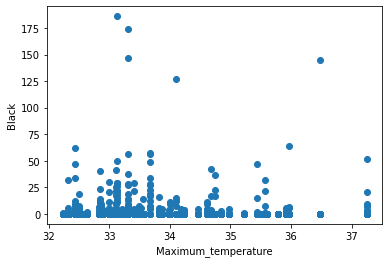

In [413]:

# Filter outliers from Maximum_temperature
if All_Tem_Plu_Hum == 'Maximum_temperature' or All_Tem_Plu_Hum == 'All_the_variables_were_selected':
    print('All_Tem_Plu_Hum: ', All_Tem_Plu_Hum)
    dfCity = dfCity[dfCity.Maximum_temperature < 50]
    print ('Maximum_temperature < 50: ', dfCity.shape)
# Filter outliers from Humidity
if All_Tem_Plu_Hum == 'Humidity' or All_Tem_Plu_Hum == 'All_the_variables_were_selected':
    print('All_Tem_Plu_Hum: ', All_Tem_Plu_Hum)
    dfCity = dfCity[dfCity.Humidity > 68]
    print ('Humidity > 68: ', dfCity.shape)

# Note: Pluviometric_day does not have outliers

print('FILTERING ::: Graph  by City: ',  City, CLIMATE_VARIABLE, ' and ', BlackORRed, ':')
plt.scatter(CLIMATE_VARIABLE, BlackORRed, data= df2)
plt.xlabel(CLIMATE_VARIABLE)
plt.ylabel(BlackORRed)
plt.show()


In [414]:

import numpy as np

# create a mapping dict
# to convert class labels from strings to integers
class_mappingCity = {label: idx for idx, label in enumerate(np.unique(dfCity['City']))}
print (class_mappingCity)

# to convert class labels from strings to integers
dfCity['City'] = dfCity['City'].map(class_mappingCity)
print (dfCity.tail(5))


{'Cerete': 0}
       City  Maximum_temperature  Black
13556     0              33.4625      1
13579     0              33.4625      0
13580     0              33.4625      0
13581     0              33.4625      0
13582     0              33.4625      0


In [415]:



#Discretize the variable that represent the number of bollweills
# If bollweills < 5 assigns "Low"
# If 5 < bollweills <= 20 assigns "Medium"
# If bollweills > 20 assigns "High" 

conditionsCity = [  
    (dfCity[BlackORRed].ge(0) & dfCity[BlackORRed].lt(5)),
    (dfCity[BlackORRed].ge(5) & dfCity[BlackORRed].le(20)),
    (dfCity[BlackORRed].gt(20)),
]

# Low = 0, Medium = 1, High = 2
choicesCity = [0, 1, 2]

dfCity["bollweill_category"] = np.select(conditionsCity, choicesCity)

#Show the frequencies of the new variables
print('Show the frequencies of the new variables: (dfCity["bollweill_category"].value_counts()) \n # Low = 0, Medium = 1, High = 2')
print (dfCity["bollweill_category"].value_counts() )

#Subset X and y
#X = df2[["Pluviometric_day", "Humidity", "Maximum_temperature"]]


Show the frequencies of the new variables: (dfCity["bollweill_category"].value_counts()) 
 # Low = 0, Medium = 1, High = 2
0    2720
1     821
2     488
Name: bollweill_category, dtype: int64


In [416]:

#Obtain X and y
print ('Only ', CLIMATE_VARIABLE)
XCity = dfCity[["City", CLIMATE_VARIABLE]]

# target variable
yCity = dfCity["bollweill_category"]

print ("Class labels:", np.unique(yCity))


Only  Maximum_temperature
Class labels: [0 1 2]


## Diferent ways to select the rows, e.g.
* the first 100 rows
* the last 100 rows
* random selection

In [420]:
# Selecting the rows:

In [417]:

# TODO try: It is not neccesary to Oversampling
#OPC 1 if work with Oversampling

#WE USE OVERSAMPLING TO BALANCE THE DATASET
#We use the SMOTE approach

#Oversampling
oversample = SMOTE()
XCity, yCity = oversample.fit_resample(XCity, yCity)

#Split on training and test set
X_trainCity, X_testCity, y_trainCity, y_testCity = train_test_split(XCity, yCity, test_size = 0.3, stratify = yCity)

print ('Oversampling and Split OK')



Oversampling and Split OK


In [418]:
#OPC1
#Standarize the data
sc = StandardScaler()

sc.fit(X_trainCity)

X_train_stdCity = sc.transform(X_trainCity)
X_test_stdCity = sc.transform(X_testCity)

#Or may be only XCity, because we do not need divide in train and test, all will be TEST.
#X_test_stdCity = sc.transform(XCity)

print ('Standarized OK')


Standarized OK


In [419]:
#OPC3 OK

#Now I assume that the prediction was made with XGBoost and I will test:
# predict with Lorica-Red ->> Monteria, Cienaga de Oro


#This line dont should be used (It is only for recall purposes)
#Train the model with default settings
# xgb_classifier.fit(X_train_stdCity, y_trainCity)

#Predict on test and train set Predict on test and train set Predict on test and train set Predict on test and train set Predict on test and train set 
y_pred_testCity     = xgb_classifier.predict(X_test_stdCity)
y_pred_trainCity    = xgb_classifier.predict(X_train_stdCity) #prediction on train set


#Or may be only XCity, because we do not need divide in train and test, all will be TEST.
#y_pred_testCity     = xgb_classifier.predict(XCity)


#Results of confusion matrix:
print("Evaluation of  model by City ", City)
cm = confusion_matrix (y_pred_testCity, y_testCity)
print (cm)

#Print accuracy of the model
print ("=============Results for ", BlackORRed, " City: ", City, " and Variable: ", All_Tem_Plu_Hum, ". Way 1 =============================")
print ("Accuracy: %.4f" % accuracy_score (y_testCity, y_pred_testCity))
print ("F1-Score: %.4f" % f1_score       (y_testCity, y_pred_testCity, average="micro"))
print (classification_report             (y_testCity, y_pred_testCity))





# para el  conjunto de entrenamiento
print("Evaluación del desempeño del modelo con TRAIN")
cm = confusion_matrix (y_pred_trainCity, y_trainCity)
print (cm)
#Print accuracy of the model
print ("=============Results for ", BlackORRed, " City: ", City, " and Variable: ", All_Tem_Plu_Hum, ". Way 1 =============================")
print ("Accuracy: %.4f" % accuracy_score    (y_trainCity, y_pred_trainCity))
print ("F1-Score: %.4f" %       f1_score    (y_trainCity, y_pred_trainCity, average="micro"))
print (classification_report                (y_trainCity, y_pred_trainCity))



Evaluation of  model by City  Cerete
[[153 205 228]
 [239 263 291]
 [424 348 297]]
=============Results for  Black  City:  Cerete  and Variable:  Maximum_temperature . Way 1 =============================
Accuracy: 0.2913
F1-Score: 0.2913
              precision    recall  f1-score   support

           0       0.26      0.19      0.22       816
           1       0.33      0.32      0.33       816
           2       0.28      0.36      0.32       816

    accuracy                           0.29      2448
   macro avg       0.29      0.29      0.29      2448
weighted avg       0.29      0.29      0.29      2448

Evaluación del desempeño del modelo con TRAIN
[[375 490 475]
 [567 604 717]
 [962 810 712]]
=============Results for  Black  City:  Cerete  and Variable:  Maximum_temperature . Way 1 =============================
Accuracy: 0.2960
F1-Score: 0.2960
              precision    recall  f1-score   support

           0       0.28      0.20      0.23      1904
           1       0.32  

## End Other City

In [ ]:

# Unserpervised - cluster - K-means++


In [ ]:
print('End.')